In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_colwidth = 10000

#pd.set_option('display.max_columns', 1000)
#added by owen. 



In [2]:
carData = pd.read_table(r"D:\FLAT_CMPL.txt", error_bad_lines = False,  encoding = 'latin1')


b'Skipping line 562494: expected 49 fields, saw 70\n'
b'Skipping line 1032228: expected 49 fields, saw 50\n'
b'Skipping line 1208328: expected 49 fields, saw 50\n'
b'Skipping line 1293123: expected 49 fields, saw 50\n'
b'Skipping line 1297996: expected 49 fields, saw 50\nSkipping line 1297997: expected 49 fields, saw 50\nSkipping line 1297998: expected 49 fields, saw 50\n'
b'Skipping line 1317867: expected 49 fields, saw 50\nSkipping line 1322779: expected 49 fields, saw 50\nSkipping line 1324687: expected 49 fields, saw 50\n'
b'Skipping line 1331383: expected 49 fields, saw 50\nSkipping line 1334710: expected 49 fields, saw 50\n'
C:\Users\owen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
carData.columns = ['cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt','yeartxt', 'crash','faildate','fire','injured','deaths','compdesc','city', 'state', 'vin', 'datea', 'ldate', 'miles', 'occurences', 'cdescr', 'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn', 'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train', 'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size', 'loc_of_tire', 'tire_fail_type','orig_equip_yn', 'manuf_dt', 'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel', 'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn']
#added by owen. 

In [4]:
analyzer = SentimentIntensityAnalyzer()



In [5]:
carData.keys()



Index(['cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt', 'yeartxt',
       'crash', 'faildate', 'fire', 'injured', 'deaths', 'compdesc', 'city',
       'state', 'vin', 'datea', 'ldate', 'miles', 'occurences', 'cdescr',
       'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn',
       'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train',
       'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size',
       'loc_of_tire', 'tire_fail_type', 'orig_equip_yn', 'manuf_dt',
       'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel',
       'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn',
       'medical_attn', 'veichles_towed_yn'],
      dtype='object')

In [6]:
carData


,cmplid,odino,mfr_name,maketxt,modeltxt,yeartxt,crash,faildate,fire,injured,deaths,compdesc,city,state,vin,datea,ldate,miles,occurences,cdescr,cmpl_type,police_rpt_yn,purch_dt,orig_owner_yn,anti_breaks_yn,cruise_cont_yn,num_cyls,drive_train,fuel_sys,fuel_type,trans_type,veh_speed,dot,tire_size,loc_of_tire,tire_fail_type,orig_equip_yn,manuf_dt,seat_type,restraint_type,dealer_name,dealer_tel,dealer_city,dealer_state,dealer_zip,prod_type,repaired_yn,medical_attn,veichles_towed_yn
0,2,958156.0,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,1994.0,Y,19941226.0,N,0.0,0.0,PARKING BRAKE:CONVENTIONAL,SAN JOSE,CA,JT2EL45U5R0,19950103,19950103,NaN,1.0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
1,3,958124.0,TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,1994.0,Y,19941128.0,N,0.0,0.0,AIR BAGS:FRONTAL,PHOENIX,AZ,NaN,19950103,19950103,NaN,NaN,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
2,4,958122.0,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,1994.0,NaN,19950103.0,N,0.0,0.0,SUSPENSION,TUCSON,AZ,JN1HJ01F4RT,19950103,19950103,NaN,NaN,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
3,5,958247.0,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,1994.0,NaN,NaN,N,0.0,0.0,SUSPENSION:FRONT,ABINGDON,MD,NaN,19950103,19950103,NaN,NaN,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
4,6,958161.0,GERRY,GERRY,CHILD SAFETY SEAT,1993.0,NaN,19941231.0,NaN,0.0,0.0,CHILD SEAT,AURORA,CO,NaN,19950103,19950103,NaN,NaN,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
5,7,958117.0,FORD MOTOR COMPANY,FORD,PROBE,1991.0,NaN,19950103.0,N,0.0,0.0,SEAT BELTS:FRONT:RETRACTOR,CANTON,OH,1ZVPT20C1M5,19950103,19950103,NaN,4.0,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
6,8,958155.0,Ford Motor Company,FORD,WINDSTAR,1995.0,NaN,19940808.0,N,0.0,0.0,"SERVICE BRAKES, HYDRAULIC:FOUNDATION COMPONENTS",CATONSVILLE,MD,2FMDA514XSB,19950103,19950103,NaN,NaN,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
7,9,958154.0,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,1991.0,Y,19950102.0,N,0.0,0.0,VEHICLE SPEED CONTROL,CARLISLE,PA,1G1BN53E5MW,19950103,19950103,NaN,1.0,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
8,10,958120.0,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,1994.0,Y,19941106.0,N,0.0,0.0,AIR BAGS:FRONTAL,BERKELEY,CA,1HGEG866GRL,19950103,19950103,NaN,1.0,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
9,11,958148.0,General Motors LLC,CHEVROLET,LUMINA,1994.0,NaN,NaN,N,0.0,0.0,SEAT BELTS:FRONT:RETRACTOR,BAXLEY,GA,1GNDU06L0RT,19950103,19950103,NaN,NaN,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN


In [7]:
carData.describe()




C:\Users\owen\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,cmplid,odino,yeartxt,faildate,injured,deaths,datea,ldate,miles,occurences,purch_dt,num_cyls,veh_speed,manuf_dt
count,1.368233e+06,1.368227e+06,1.368039e+06,1.257190e+06,651308.000000,634701.000000,1.368233e+06,1.368233e+06,7.404100e+05,927174.000000,3.662760e+05,405188.000000,675425.000000,5.039000e+03
mean,6.842617e+05,7.827441e+06,2.357167e+03,2.006900e+07,0.142374,0.009869,2.007360e+07,2.007333e+07,6.824381e+04,11.112723,2.001299e+07,5.883183,28.022284,2.006698e+07
std,3.950828e+05,5.581326e+06,1.646848e+03,1.489508e+05,0.801051,0.440330,6.433007e+04,6.470871e+04,1.117586e+05,256.474648,2.554449e+05,1.619967,27.704718,2.584675e+05
min,2.000000e+00,0.000000e+00,1.949000e+03,3.102000e+04,0.000000,0.000000,1.995010e+07,1.984022e+07,-9.500000e+04,-2.000000,1.072200e+04,0.000000,-70.000000,2.000403e+06
25%,3.420600e+05,NaN,NaN,NaN,NaN,NaN,2.002021e+07,2.002011e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.842970e+05,NaN,NaN,NaN,NaN,NaN,2.008072e+07,2.008072e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.026380e+06,NaN,NaN,NaN,NaN,NaN,2.013120e+07,2.013120e+07,NaN,NaN,NaN,NaN,NaN,NaN
max,1.368747e+06,1.000000e+09,9.999000e+03,2.203073e+07,99.000000,99.000000,2.017041e+07,2.017041e+07,9.999999e+06,9999.000000,9.898101e+07,99.000000,999.000000,2.016121e+07


In [8]:
#Collecting all of the numeric data into a lovely franken frame. Strings are also taken. This allows us to mine sentiment. 
# all possible columns = 'cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt','yeartxt', 'crash','faildate','fire','injured','deaths','compdesc','city', 'state', 'vin','datea', 'ldate', 'miles', 'occurences', 'cdescr', 'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn', 'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train', 'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size', 'loc_of_tire', 'tire_fail_type','orig_equip_yn', 'manuf_dt', 'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel', 'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn'
frankenFrame = pd.DataFrame(columns = ['string', 'manufacturer', 'make', 'model', 'year' 'antilock', 'fire', 'injured', 'death','crash', 'miles', 'police_rpt_yn', 'cruise_cont_yn', 'fuel_sys', 'trans_type', 'veh_speed', 'tire_size', 'orig_equip_yn', 'seat_type', 'restraint_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn', 'compound',])
#frankenFrame['ComplaintNum'] = carData['1'] # No longer kept track of in order to drop duplicates. 
frankenFrame['string'] = carData['cdescr']
frankenFrame['manufacturer'] = carData['mfr_name']
frankenFrame['make'] = carData['maketxt']
frankenFrame['model'] = carData['modeltxt']
frankenFrame['antilock'] = carData['anti_breaks_yn']
frankenFrame['fire'] = carData['fire']
frankenFrame['injured'] = carData['injured']
frankenFrame['crash'] = carData['crash']
frankenFrame['miles'] = carData['miles']
frankenFrame['police_rpt_yn'] = carData['police_rpt_yn']
frankenFrame['cruise_cont_yn'] = carData['cruise_cont_yn']
frankenFrame['fuel_sys'] = carData['fuel_sys']
frankenFrame['trans_type'] = carData['trans_type']
frankenFrame['veh_speed'] = carData['veh_speed']
frankenFrame['tire_size'] = carData['tire_size']
frankenFrame['orig_equip_yn'] = carData['orig_equip_yn']
frankenFrame['seat_type'] = carData['seat_type']
frankenFrame['restraint_type'] = carData['restraint_type']
frankenFrame['repaired_yn'] = carData['repaired_yn']
frankenFrame['medical_attn'] = carData['medical_attn']
frankenFrame['veichles_towed_yn'] = carData['veichles_towed_yn']
frankenFrame['year'] = carData['yeartxt']

#added by owen. 

In [9]:
#cleaning repeated rows. 
frankenFrame = frankenFrame.drop_duplicates()



In [10]:
frankenFrame





,string,manufacturer,make,model,yearantilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound,antilock,year
0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993.0
5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0
7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0


In [11]:
frankenFrame = frankenFrame[pd.notnull(frankenFrame['string'])]





In [12]:
frankenFrame


,string,manufacturer,make,model,yearantilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound,antilock,year
0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993.0
5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0
7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0


In [13]:
frankenFrame = frankenFrame.reset_index()


In [14]:
total_rows = frankenFrame.count()
print (total_rows)


index                1075447
string               1075447
manufacturer         1075279
make                 1075279
model                1075279
yearantilock               0
fire                 1008107
injured               499856
death                      0
crash                 864745
miles                 561931
police_rpt_yn         959043
cruise_cont_yn        927731
fuel_sys              263998
trans_type            253632
veh_speed             511206
tire_size              11020
orig_equip_yn           9676
seat_type               4790
restraint_type          4260
repaired_yn            14504
medical_attn          225378
veichles_towed_yn     139380
compound                   0
antilock              925746
year                 1075279
dtype: int64


In [15]:
recalls = pd.read_table(r"D:\FLAT_RCL.txt", error_bad_lines = False,  encoding = 'ISO-8859-1')
recalls.columns = ['cmplid', 'odino', 'maketxt', 'modeltxt', 'yeartxt', '1', '2','3','4','5','6', '7','8','9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19']#may add type of recall, too...


C:\Users\owen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
recalls




,cmplid,odino,maketxt,modeltxt,yeartxt,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,V,291854.0,20030210.0,ODI,Ford Motor Company,20021106.0,20021106,NaN,NaN,"CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC ENGINES, LOOSE OR BROKEN ATTACHMENTS AND MISROUTED BATTERY CABLES COULD LEAD TO CABLE INSULATION DAMAGE.","THIS, IN TURN, COULD CAUSE THE BATTERY CABLES TO SHORT RESULTING IN HEAT DAMAGE TO THE CABLES. BESIDES HEAT DAMAGE, THE ""CHECK ENGINE"" LIGHT MAY ILLUMINATE, THE VEHICLE MAY FAIL TO START, OR SMOKE, MELTING, OR FIRE COULD ALSO OCCUR.","DEALERS WILL INSPECT THE BATTERY CABLES FOR THE CONDITION OF THE CABLE INSULATION AND PROPER TIGHTENING OF THE TERMINAL ENDS. AS NECESSARY, CABLES WILL BE REROUTED, RETAINING CLIPS INSTALLED, AND DAMAGED BATTERY CABLES REPLACED. OWNER NOTIFICATION BEGAN FEBRUARY 10, 2003. OWNERS WHO DO NOT ...",ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION'S AUTO SAFETY HOTLINE AT 1-888-DASH-2-DOT (1-888-327-4236).,000015339000215021000000202
1,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,V,86.0,20020923.0,MFR,"Jayco, Inc.",20020904.0,20020912,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL CERTIFICATION (AND RVIA) LABELS HAVE THE INCORRECT GROSS VEHICLE WEIGHT RATING, TIRE SIZE, AND INFLATION PRESSURE LISTED.","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COULD BLOW RESULTING IN A POSSIBLE CRASH.","OWNERS WILL BE MAILED CORRECT LABELS FOR INSTALLATION ON THEIR VEHICLES. OWNER NOTIFICATION BEGAN SEPTEMBER 23, 2002. OWNERS SHOULD CONTACT JAYCO AT 1-877-825-4782.","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION'S AUTO SAFETY HOTLINE AT 1-888-DASH-2-DOT (1-888-327-4236).",000015210000106403000000349
2,4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,V,6223.0,20021105.0,MFR,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUSS NETWORK SUPPORT SYSTEM HAS A POTENTIAL TO WEAKEN CAUSING INTERNAL AND EXTERNAL FEATURES TO BECOME MISALIGNED. THE AFFECTED VEHICLES ARE 1999 - 2003 CLASS A MOTOR HOMES MANUFACTURED ON F53 20,500 POUND GROSS VEHICLE WEIGHT RATING (GVWR), FORD CHASS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE SUSPENSION AND AMPLIFICATION OF THE STRESS PLACED ON THE FLOOR TRUSS NETWORK. THE ADDITIONAL STRESS CAN RESULT IN THE FRACTURE OF WELDS SECURING THE FLOOR TRUSS NETWORK SYSTEM TO THE CHASSIS FRAME RAIL AND/OR FRACTURE OF THE FLOOR TRUSS NETWORK SUP...,"DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK SUPPORT SYSTEM, REINFORCE THE EXISTING STRUCTURE, AND REPAIR, AS NEEDED, THE FLOOR TRUSS NETWORK SUPPORT. OWNER NOTIFICATION BEGAN NOVEMBER 5, 2002. OWNERS SHOULD CONTACT MONACO AT 1-800-685-6545.",CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION'S AUTO SAFETY HOTLINE AT 1-888-DASH-2-DOT (1-888-327-4236).,000015211000106325000000272
3,5,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,V,6223.0,20021105.0,MFR,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUSS NETWORK SUPPORT SYSTEM HAS A POTENTIAL TO WEAKEN CAUSING INTERNAL AND EXTERNAL FEATURES TO BECOME MISALIGNED. THE AFFECTED VEHICLES ARE 1999 - 2003 CLASS A MOTOR HOMES MANUFACTURED ON F53 20,500 POUND GROSS VEHICLE WEIGHT RATING (GVWR), FORD CHASS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE SUSPENSION AND AMPLIFICATION OF THE STRESS PLACED ON THE FLOOR TRUSS NETWORK. THE ADDITIONAL STRESS CAN RESULT IN THE FRACTURE OF WELDS SECURING THE FLOOR TRUSS NETWORK SYSTEM TO THE CHASSIS FRAME RAIL AND/OR FRACTURE OF THE FLOOR TRUSS NETWORK SUP...,"DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK SUPPORT SYSTEM, REINFORCE THE EXISTING STRUCTURE, AND REPAIR, AS NEEDED, THE FLOOR TRUSS NETWORK SUPPORT. OWNER NOTIFICATION BEGAN NOVEMBER 5, 2002

In [17]:
#count = 0

#method for checking recalls. 


#for index, row in frankenFrame.iterrows(): # this is a test... 
#    if count >= 100: #only 100000 for now... 
#        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
#    for index2, row2 in recalls.iterrows()
#        if row['maketxt'] = row2['maketxt'] and row['modeltxt'] = row2['modeltxt'] and row['yeartxt'] = row2['yeartxt']:
#            row['isRecalled'] = 't'
#            break
        

#  #  row['isRecalled'] = 'f'
    
    #count += 1
    #added by owen. 

In [18]:
#vs = np.array()



count = 0

sent = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 50000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count <= 50000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent = sent.append( vs, ignore_index=True)
        #sent.ix[index, 'index'] = index
        #sent.ix[index, 'string'] = row['string']
        #sent.ix[index, 'make'] = row['make']
        #sent.ix[index, 'model'] = row['model']
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    count += 1
    
   
    
    #added by owen. 

In [ ]:
sent



In [19]:
#vs = np.array()




count = 0

sent2 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 100000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 50000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent2 = sent2.append( vs, ignore_index=True)

        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    count += 1
    
   
    
    #added by owen. 

In [31]:
#vs = np.array()



count = 0

sent3 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 150000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 100000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent3 = sent3.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 


In [32]:
#vs = np.array()



count = 0

sent4 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 200000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 150000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent4 = sent4.append( vs, ignore_index=True)

    
    
    count += 1
    
   

    
    #added by owen. 

In [33]:
#vs = np.array()




count = 0

sent5 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 250000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 200000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent5 = sent5.append( vs, ignore_index=True)

    
    count += 1
    
   
    
    #added by owen. 

In [34]:
#vs = np.array()



count = 0

sent6 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 300000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 250000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent6 = sent6.append( vs, ignore_index=True)

    count += 1
    
   
    
    #added by owen. 

In [35]:
#vs = np.array()



count = 0

sent7 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 350000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 300000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent7 = sent7.append( vs, ignore_index=True)

    
    count += 1
    
   
    
    #added by owen. 

In [36]:
#vs = np.array()



count = 0

sent8 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 400000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 350000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent8 = sent8.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [37]:
#vs = np.array()



count = 0

sent9 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 450000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 400000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent9 = sent9.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [38]:
#vs = np.array()



count = 0

sent10 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 500000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 450000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent10 = sent10.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [39]:
#vs = np.array()



count = 0

sent11 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 550000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 500000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent11 = sent11.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 
    

In [40]:
#vs = np.array()



count = 0

sent12 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 600000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 550000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent12 = sent12.append( vs, ignore_index=True)

    
    count += 1
    
   
    
    #added by owen. 

In [41]:
#vs = np.array()



count = 0

sent13 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 650000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 600000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent13 = sent13.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [42]:
#vs = np.array()



count = 0

sent14 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 700000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 650000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent14 = sent14.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [43]:
#vs = np.array()



count = 0

sent15 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 750000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 700000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent15 = sent15.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 
    

In [44]:
#vs = np.array()



count = 0

sent16 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 800000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 750000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent16 = sent16.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 
    

In [45]:
#vs = np.array()



count = 0

sent17 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 850000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 800000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent17 = sent17.append( vs, ignore_index=True)

    
    count += 1
    
   
    
    #added by owen. 

In [46]:
#vs = np.array()



count = 0

sent18 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 900000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 850000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent18 = sent18.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [47]:
#vs = np.array()



count = 0

sent19 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 950000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 900000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent19 = sent19.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [21]:
#vs = np.array()



count = 0

sent20 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 1000000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 950000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent20 = sent20.append( vs, ignore_index=True)

    
    
    
    count += 1
    
   
    
    #added by owen. 

In [22]:
#vs = np.array()



count = 0

sent21 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    
    if count >= total_rows['string']: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 1000000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        #frankenFrame.ix[index, 'compound'] = vs['compound']
        vs['index'] = index
        vs['string'] = row['string']
        vs['make'] = row['make']
        vs['model'] = row['model']
        #row['compound'] = vs['compound']
        
        sent21 = sent21.append( vs, ignore_index=True)

    
    
    count += 1
    
   
    
    #added by owen. 

In [48]:
fullsent = pd.DataFrame()
fullsent = fullsent.append( sent, ignore_index=True)
fullsent = fullsent.append( sent2, ignore_index=True)
fullsent = fullsent.append( sent3, ignore_index=True)
fullsent = fullsent.append( sent4, ignore_index=True)
fullsent = fullsent.append( sent5, ignore_index=True)
fullsent = fullsent.append( sent6, ignore_index=True)
fullsent = fullsent.append( sent7, ignore_index=True)
fullsent = fullsent.append( sent8, ignore_index=True)
fullsent = fullsent.append( sent9, ignore_index=True)
fullsent = fullsent.append( sent10, ignore_index=True)
fullsent = fullsent.append( sent11, ignore_index=True)
fullsent = fullsent.append( sent12, ignore_index=True)
fullsent = fullsent.append( sent13, ignore_index=True)
fullsent = fullsent.append( sent14, ignore_index=True)
fullsent = fullsent.append( sent15, ignore_index=True)
fullsent = fullsent.append( sent16, ignore_index=True)
fullsent = fullsent.append( sent17, ignore_index=True)
fullsent = fullsent.append( sent18, ignore_index=True)
fullsent = fullsent.append( sent19, ignore_index=True)
fullsent = fullsent.append( sent20, ignore_index=True)
fullsent = fullsent.append( sent21, ignore_index=True)
    
    

In [26]:
#the last 20 or so  frames were added by owen. 

In [90]:
fullsent


,compound,index,make,model,neg,neu,pos,string,length
0,0.0258,0.0,TOYOTA,PASEO,0.182,0.629,0.189,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,77
1,-0.5423,1.0,TOYOTA,COROLLA,0.275,0.616,0.109,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",109
2,-0.5423,2.0,NISSAN,MAXIMA,0.171,0.829,0.000,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,99
3,0.0000,3.0,NISSAN,PATHFINDER,0.000,1.000,0.000,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,93
4,-0.4215,4.0,GERRY,CHILD SAFETY SEAT,0.318,0.682,0.000,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,45
5,-0.1531,5.0,FORD,PROBE,0.078,0.922,0.000,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,106
6,0.0000,6.0,FORD,WINDSTAR,0.000,1.000,0.000,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,63
7,-0.4767,7.0,CHEVROLET,CAPRICE,0.341,0.659,0.000,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,45
8,0.0000,8.0,HONDA,CIVIC,0.000,1.000,0.000,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,58
9,0.0000,9.0,CHEVROLET,LUMINA,0.000,1.000,0.000,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,53


In [50]:
fullsent.to_csv('FinalSmallSent.csv')#all of the sentiment. might have an extra row every 50000 row... 

In [69]:
fullsent['length'] = fullsent["string"].str.len()

In [70]:
fullsent

,compound,index,make,model,neg,neu,pos,string,length
0,0.0258,0.0,TOYOTA,PASEO,0.182,0.629,0.189,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,77
1,-0.5423,1.0,TOYOTA,COROLLA,0.275,0.616,0.109,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",109
2,-0.5423,2.0,NISSAN,MAXIMA,0.171,0.829,0.000,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,99
3,0.0000,3.0,NISSAN,PATHFINDER,0.000,1.000,0.000,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,93
4,-0.4215,4.0,GERRY,CHILD SAFETY SEAT,0.318,0.682,0.000,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,45
5,-0.1531,5.0,FORD,PROBE,0.078,0.922,0.000,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,106
6,0.0000,6.0,FORD,WINDSTAR,0.000,1.000,0.000,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,63
7,-0.4767,7.0,CHEVROLET,CAPRICE,0.341,0.659,0.000,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,45
8,0.0000,8.0,HONDA,CIVIC,0.000,1.000,0.000,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,58
9,0.0000,9.0,CHEVROLET,LUMINA,0.000,1.000,0.000,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,53


In [ ]:
fullsent.keys()

In [ ]:
fullsent 

In [135]:
sampleSent = fullsent.groupby(fullsent.index // 1000).mean()

In [138]:
sampleTotal = frankenFrame.groupby(fullsent.index // 1000).mean()

In [139]:
sampleTotal

,index,injured,miles,veh_speed,year
0,5.151920e+02,0.097000,NaN,NaN,2192.407000
1,1.536953e+03,0.093000,NaN,0.000000,2152.152000
2,2.583329e+03,0.115000,NaN,NaN,2247.495000
3,3.625763e+03,0.114000,NaN,20.000000,2503.963000
4,4.656024e+03,0.105000,NaN,NaN,2255.315000
5,5.684405e+03,0.094094,NaN,NaN,2127.187000
6,6.710068e+03,0.090000,NaN,NaN,2207.754000
7,7.752005e+03,0.103000,3000.000000,55.000000,2247.543000
8,8.801288e+03,0.129000,NaN,35.000000,2223.303000
9,9.838961e+03,0.096096,NaN,NaN,2151.107000


In [140]:
frankenFrame

,index,string,manufacturer,make,model,yearantilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound,antilock,year
0,0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
1,1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
2,2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
3,3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
4,4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993.0
5,5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
6,6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0
7,7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
8,8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
9,9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0


In [113]:
sampleSent

,compound,index,neg,neu,pos,length
0,-0.307824,499.5,0.234135,0.746132,0.019737,67.044000
1,-0.324724,1499.5,0.257927,0.726786,0.015294,63.829000
2,-0.297534,2499.5,0.196536,0.781655,0.021812,78.906000
3,-0.244163,3499.5,0.179455,0.791886,0.028659,78.624000
4,-0.261162,4499.5,0.179307,0.795193,0.025497,76.501000
5,-0.260025,5499.5,0.182815,0.791767,0.025413,76.581000
6,-0.242473,6499.5,0.189108,0.783053,0.027840,71.044000
7,-0.248478,7499.5,0.165678,0.808553,0.025764,79.356000
8,-0.229320,8499.5,0.153025,0.815259,0.031708,82.842000
9,-0.265601,9499.5,0.184185,0.797022,0.018793,74.349000


In [ ]:
frankenFrame

In [97]:
test = analyzer.polarity_scores("Some dogs are doggos, some are puppers, and others may even be pupperinos. The chunky ones are thicc, and the thin ones are long bois.")
print(test)

{'pos': 0.0, 'compound': 0.0, 'neu': 1.0, 'neg': 0.0}


In [ ]:
testSent = pd.read_csv(r"sentFINAL.csv")

In [ ]:
testSent

In [ ]:
frankenFrame = frankenFrame[np.isfinite(frankenFrame['compound'])]
#with help from: http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

In [ ]:
frankenFrame.describe() 

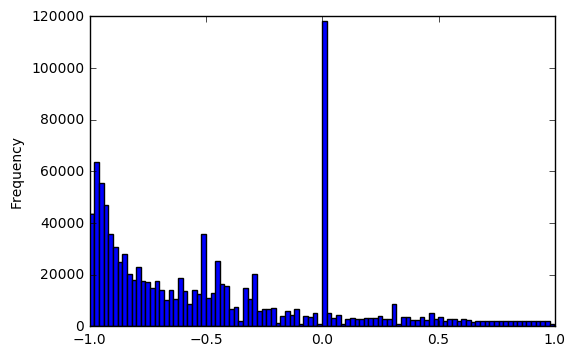

In [52]:
fullsent['compound'].plot.hist(stacked = True, bins = 100)

plt.show()


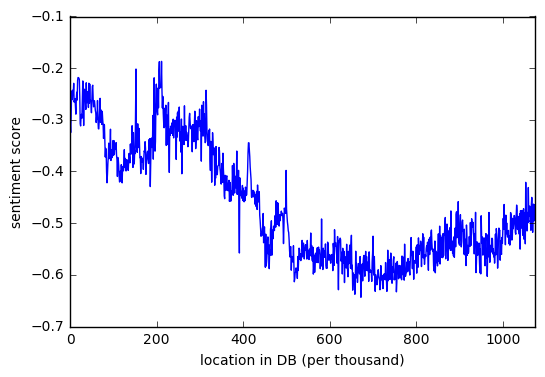

In [136]:
plot = sampleSent["compound"].plot()

plot.set_xlabel('location in DB (per thousand)')
plot.set_ylabel('sentiment score')


plt.show()


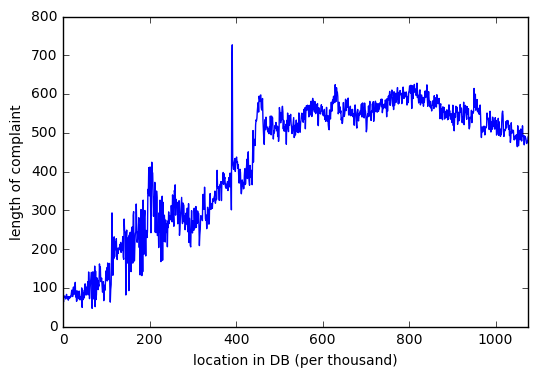

In [137]:
plot = sampleSent["length"].plot()

plot.set_xlabel('location in DB (per thousand)')
plot.set_ylabel('length of complaint')



plt.show()

In [53]:
sortFrame = fullsent.sort_values(by = 'compound', ascending=[True])

In [67]:
test = sortFrame["string"].str.len()

In [68]:
test

370169     28175
512579     35251
356046     28534
1006072    15713
980197     26198
1015408    30963
1067652    22959
682772      6192
999956     13652
1016830    20430
596077     13340
1062653    17876
493759      1999
331067     11928
865681      1477
932184      1871
439347      1259
1047757    11135
854263      1855
794757      1838
395789      1843
799709      1698
894148      1886
769662      1900
391882      1740
846116      1905
454220      1931
716786      1990
354332      1703
1004769     1885
           ...  
861035      1702
1016805     1781
718043      2083
1023514     1896
895814      1797
835956      1686
905180      1092
926116      1888
609647      2008
395202      1535
755575      1519
286171      1630
383977      1897
707039      1949
707040      1949
443777      2003
332026      1999
464325      1819
488731      1186
905068      1846
989809      1898
713507      1391
1025238     1888
146959      1995
677224      2020
482063      1346
811105      1991
947269      19

In [ ]:
sortFrame.reset_index(drop=True, inplace=True)

In [81]:
fullsent.describe()


,compound,index,neg,neu,pos,length
count,1.075447e+06,1.075447e+06,1.075447e+06,1.075447e+06,1.075447e+06,1.075447e+06
mean,-4.662220e-01,5.377230e+05,1.366436e-01,8.292221e-01,3.412115e-02,4.247866e+02
std,4.790401e-01,3.104550e+05,1.155649e-01,1.174118e-01,4.783117e-02,3.907146e+02
min,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,-8.851000e-01,2.688615e+05,6.300000e-02,7.740000e-01,0.000000e+00,1.520000e+02
50%,-5.859000e-01,5.377230e+05,1.210000e-01,8.390000e-01,6.000000e-03,3.270000e+02
75%,-7.720000e-02,8.065845e+05,1.850000e-01,9.010000e-01,5.700000e-02,5.540000e+02
max,9.982000e-01,1.075446e+06,1.000000e+00,1.000000e+00,1.000000e+00,3.525100e+04


In [ ]:
checkManu = frankenFrame.groupby('model', as_index = False)['death'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [ ]:
frankenFrame.keys()

In [ ]:
frankenFrame = frankenFrame.sort_values(by = 'compound', ascending=[True])

In [ ]:
frankenFrame

In [ ]:
checkManu.reset_index(drop=True, inplace=True)
checkManu.dropna(how='any')

In [ ]:
frankenFrame.keys()

In [ ]:
checkManu = frankenFrame.groupby('model', as_index = False)['compound'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index #if there are less than 20 items, drop them. 
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [ ]:
checkManu = checkManu.sort_values(by = 'compound', ascending=[True])

In [ ]:
checkManu = checkManu.dropna(how='any')

In [ ]:
print(checkManu)

In [ ]:
sampleSent['compound'].plot.bar()
plt.axhline(0, color='k')
plt.xlabel('make')
plt.show()

In [ ]:
print (frankenFrame[5])

In [ ]:
import operator


In [ ]:
sortVs = sorted(vs.items(), key=operator.itemgetter(0))

In [ ]:
print(sortVs)

In [ ]:
carData['Ford Motor Company'].value_counts()